In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

file_path = 'data/imdb_top_1000.csv'

df_raw = pd.read_csv(file_path)

#print(df_raw['Certificate'].unique())

rating_age_map = {
    'A': 18, 'U': 0, 'UA': 7, 'U/A': 7, 'PG': 8, 'PG-13': 13, 'R': 17, 'G': 0, 'Passed': 0, 'Approved': 0, 
    'GP': 10, 'TV-14': 14, 'TV-MA': 17, 'TV-PG': 10, '16': 16, 'Unrated': None, 'NaN': None       
}
df_raw['Certificate'] = df_raw['Certificate'].map(rating_age_map)

df_raw['Runtime'] = df_raw['Runtime'].str.extract('(\d+)').astype(int)
df_raw['Genre'] = df_raw['Genre'].str.split(', ')

tfidf = TfidfVectorizer(stop_words='english')
df_raw['overview_tfidf'] = list(tfidf.fit_transform(df_raw['Overview']).toarray())

encoder = OneHotEncoder()
directors_encoded = encoder.fit_transform(df_raw[['Director']])

#print(directors_encoded)

df_raw

/var/folders/g9/l52tlt591ln8zbsxkst3mzv40000gp/T/ipykernel_94549/3544501073.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,overview_tfidf
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,18.0,142,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,18.0,175,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,7.0,152,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,18.0,202,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,0.0,96,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,18.0,115,"[Comedy, Drama, Romance]",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,0.0,201,"[Drama, Western]",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,0.0,118,"[Drama, Romance, War]",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"[Drama, War]",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


{'Drama': 724, 'Crime': 209, 'Action': 189, 'Adventure': 196, 'Biography': 109, 'History': 56, 'Sci-Fi': 67, 'Romance': 125, 'Western': 20, 'Fantasy': 66, 'Comedy': 233, 'Thriller': 137, 'Animation': 82, 'Family': 56, 'War': 51, 'Mystery': 99, 'Music': 35, 'Horror': 32, 'Musical': 17, 'Film-Noir': 19, 'Sport': 19}


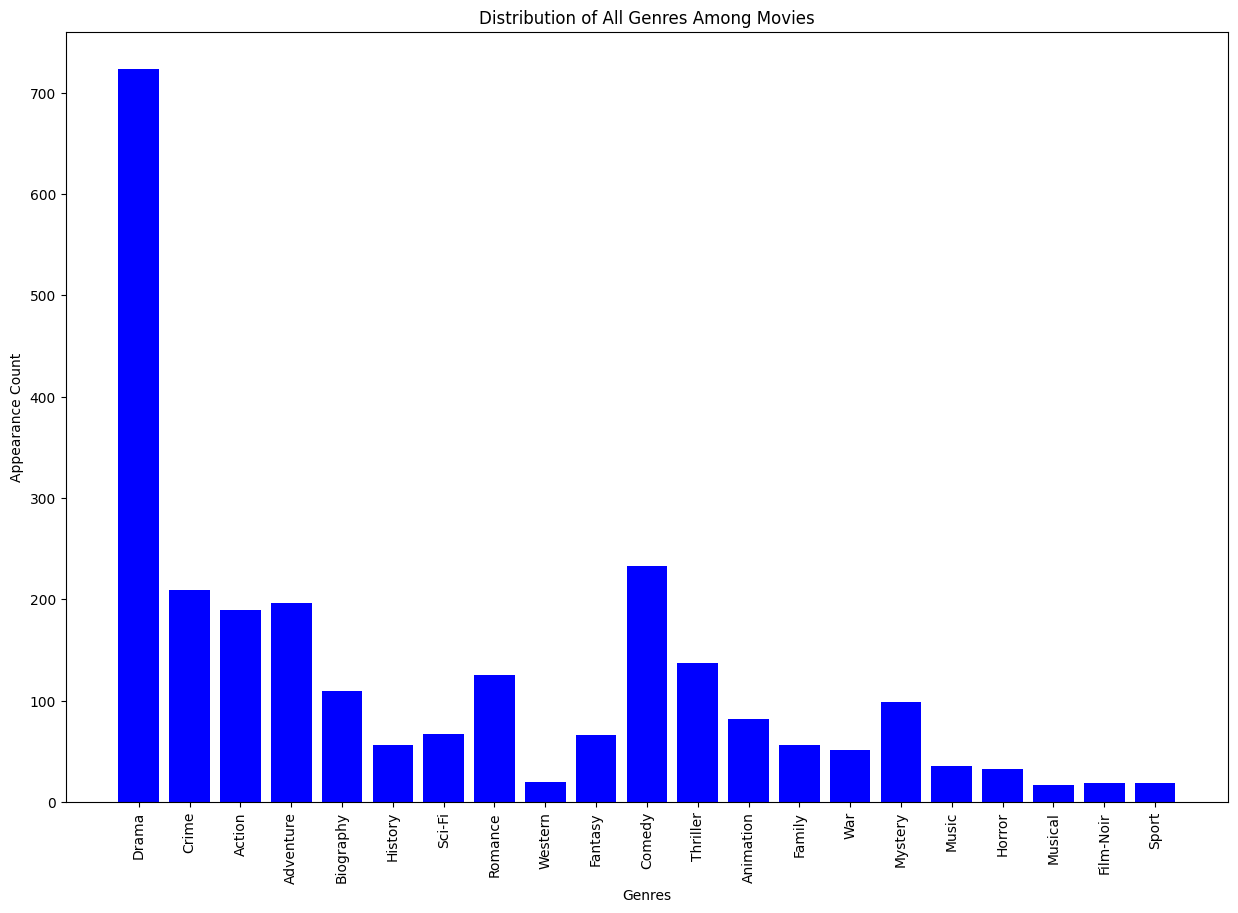

In [2]:
import matplotlib.pyplot as plt

df_genres = df_raw['Genre'].tolist()
genres_dict = {}
for lst in df_genres:
    for genre in lst:
        genres_dict[genre] = 1 + genres_dict.get(genre, 0)
print(genres_dict)

# Creating lists of keys and values from the dictionary
categories = list(genres_dict.keys())
values = list(genres_dict.values())

# Creating the bar graph
plt.figure(figsize=(15, 10))  # Set the size of the figure (optional)
plt.bar(categories, values, color='blue')  # Create bar plot

# Adding titles and labels
plt.title('Distribution of All Genres Among Movies')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Appearance Count')


# Show the plot
plt.show()


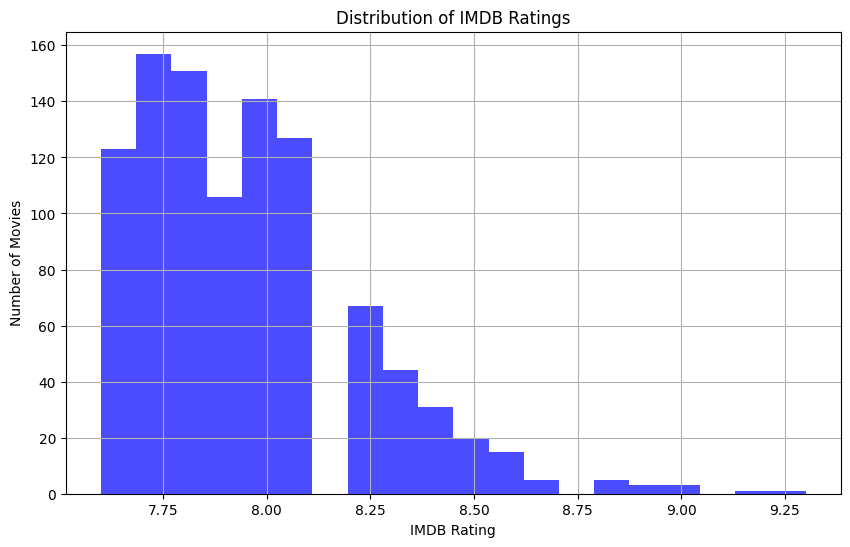

In [4]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df_raw['IMDB_Rating'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


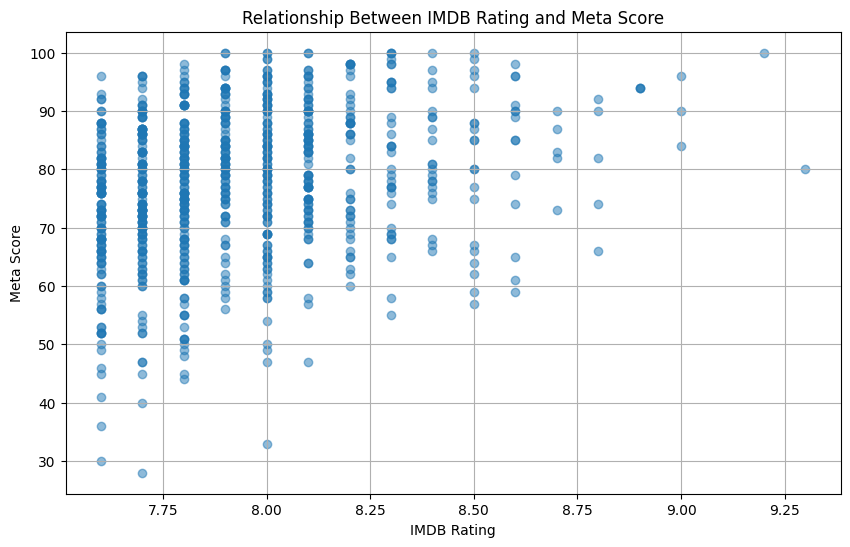

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df_raw['IMDB_Rating'], df_raw['Meta_score'], alpha=0.5)
plt.title('Relationship Between IMDB Rating and Meta Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()


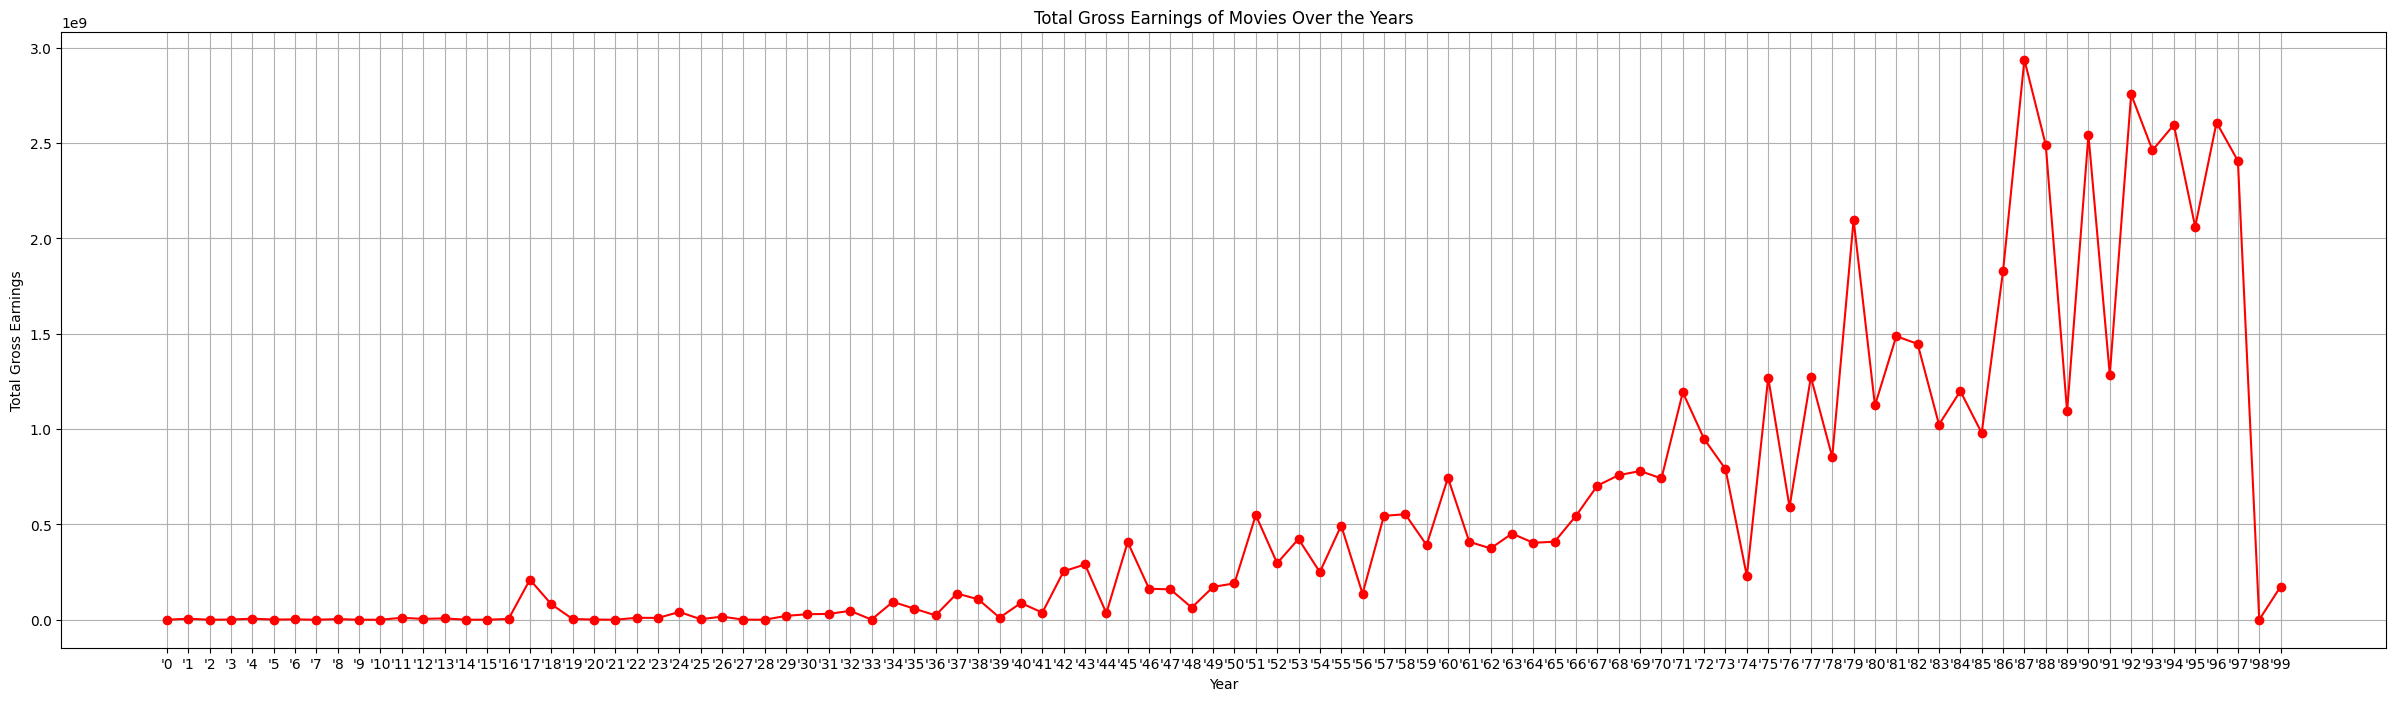

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'df' and 'yearly_gross' are already defined
# Convert Gross to numeric values after removing commas
df_raw['Gross'] = df_raw['Gross'].replace(',', '', regex=True).astype(float)

# Group by 'Released_Year' and sum the gross
yearly_gross = df_raw.groupby('Released_Year')['Gross'].sum()

def format_year(x, pos):
    # Extract the last two digits of the year and prepend with a single quote
    return f"'{int(x) % 100}"

plt.figure(figsize=(30, 8))
plt.plot(yearly_gross.index, yearly_gross.values, marker='o', linestyle='-', color='red')
plt.title('Total Gross Earnings of Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')

# Apply custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_year))

plt.grid(True)
plt.show()


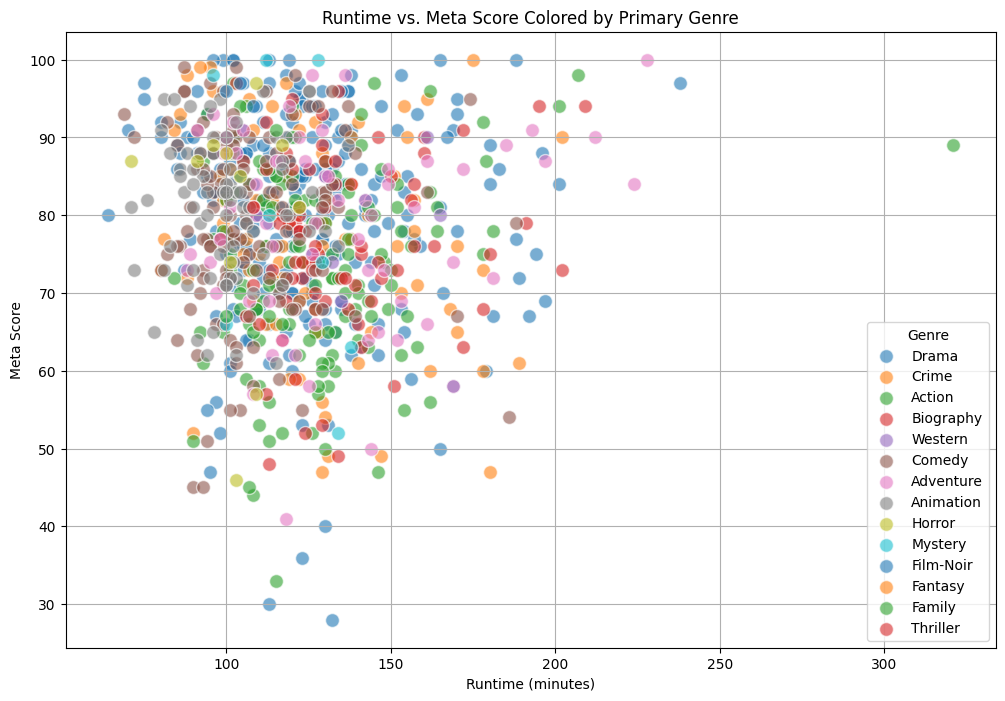

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame setup (assuming 'df' is your actual DataFrame)
# df = pd.DataFrame({
#     'Runtime': [142, 175, 152, 202, 96],
#     'Meta_score': [80, 100, 84, 90, 96],
#     'Genre': [['Drama'], ['Crime', 'Drama'], ['Action', 'Crime', 'Drama'], ['Crime', 'Drama'], ['Crime', 'Drama']]
# })

# Extract the primary genre for visualization
df_raw['Primary_Genre'] = df_raw['Genre'].apply(lambda x: x[0])

# Create a color mapping for genres
unique_genres = df_raw['Primary_Genre'].unique()
color_map = {genre: f"C{i}" for i, genre in enumerate(unique_genres)}

# Plotting
plt.figure(figsize=(12, 8))
for genre, color in color_map.items():
    # Select data for each genre
    genre_data = df_raw[df_raw['Primary_Genre'] == genre]
    plt.scatter(genre_data['Runtime'], genre_data['Meta_score'], color=color, label=genre, alpha=0.6, edgecolors='w', s=100)

plt.title('Runtime vs. Meta Score Colored by Primary Genre')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Meta Score')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


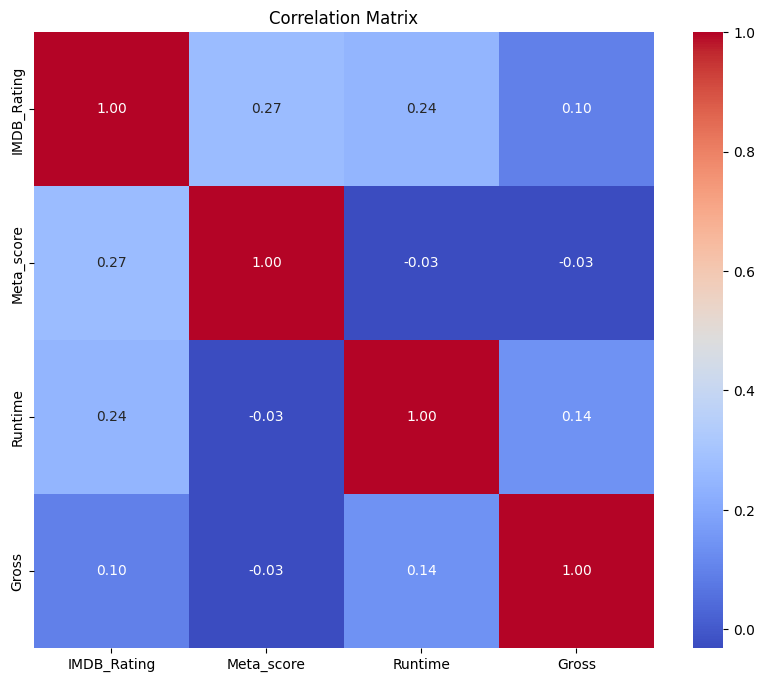

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all relevant columns to numeric where necessary
df_raw['Gross'] = df_raw['Gross'].replace('[\$,]', '', regex=True).astype(float)
df_raw['Runtime'] = df_raw['Runtime'].astype(float)
df_raw['IMDB_Rating'] = df_raw['IMDB_Rating'].astype(float)
df_raw['Meta_score'] = df_raw['Meta_score'].astype(float)

# Calculate correlation matrix
corr = df_raw[['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


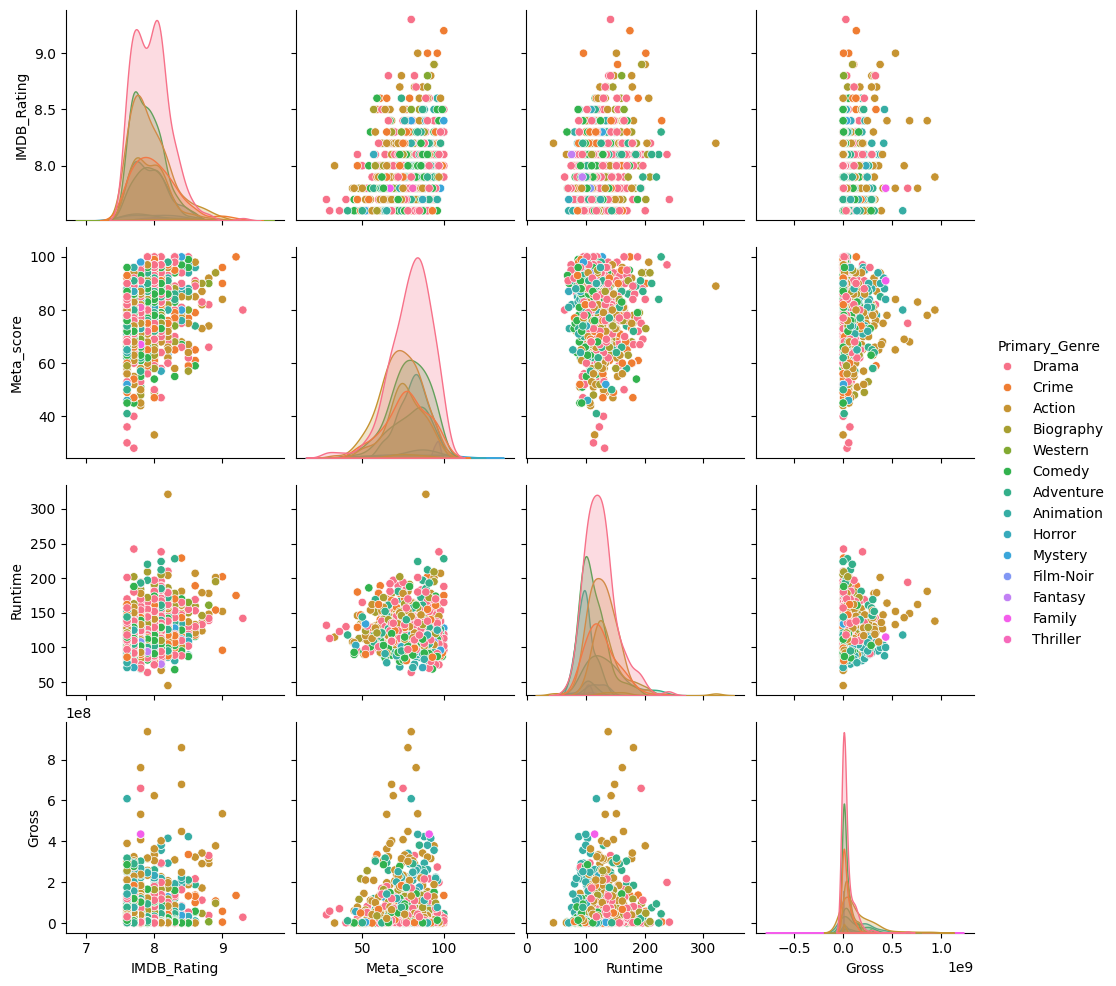

In [17]:
# Use seaborn's pairplot function to create a pair plot
sns.pairplot(df_raw[['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross', 'Primary_Genre']], hue='Primary_Genre')
plt.show()

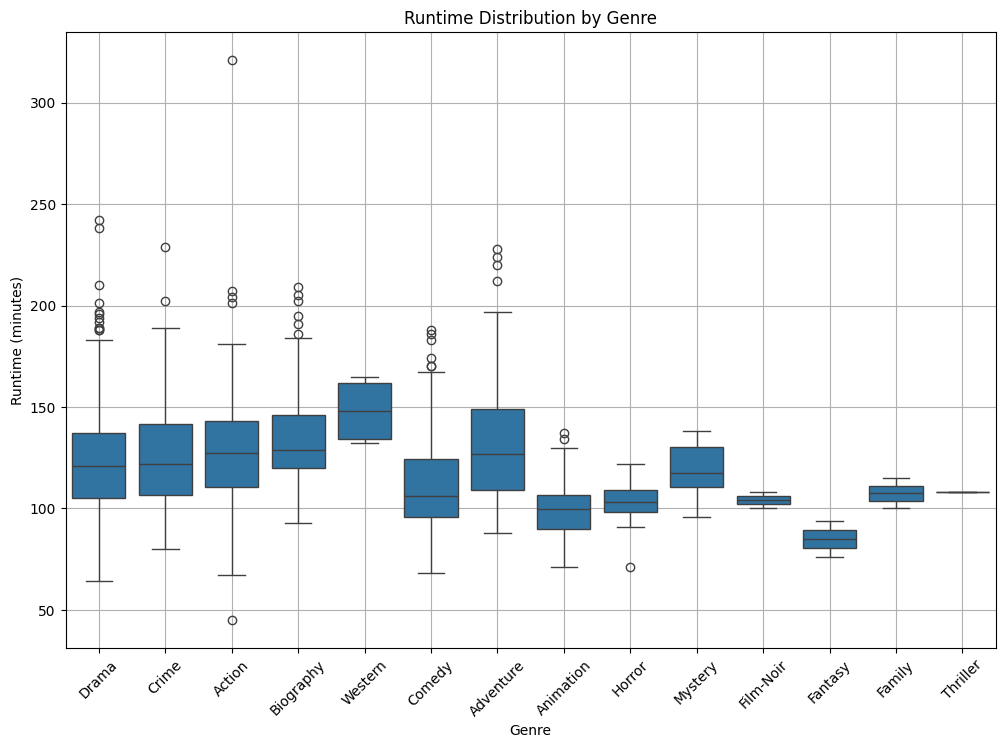

In [36]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Primary_Genre', y='Runtime', data=df_raw)
plt.xticks(rotation=45)
plt.title('Runtime Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.grid(True)
plt.show()

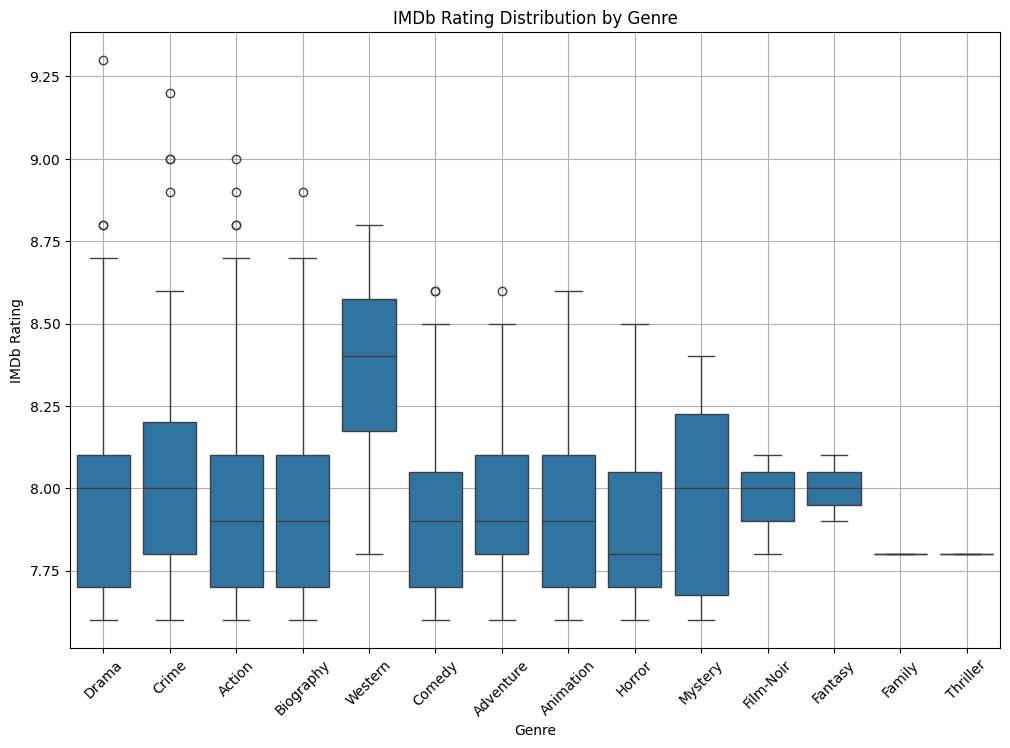

In [35]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Primary_Genre', y='IMDB_Rating', data=df_raw)
plt.xticks(rotation=45)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

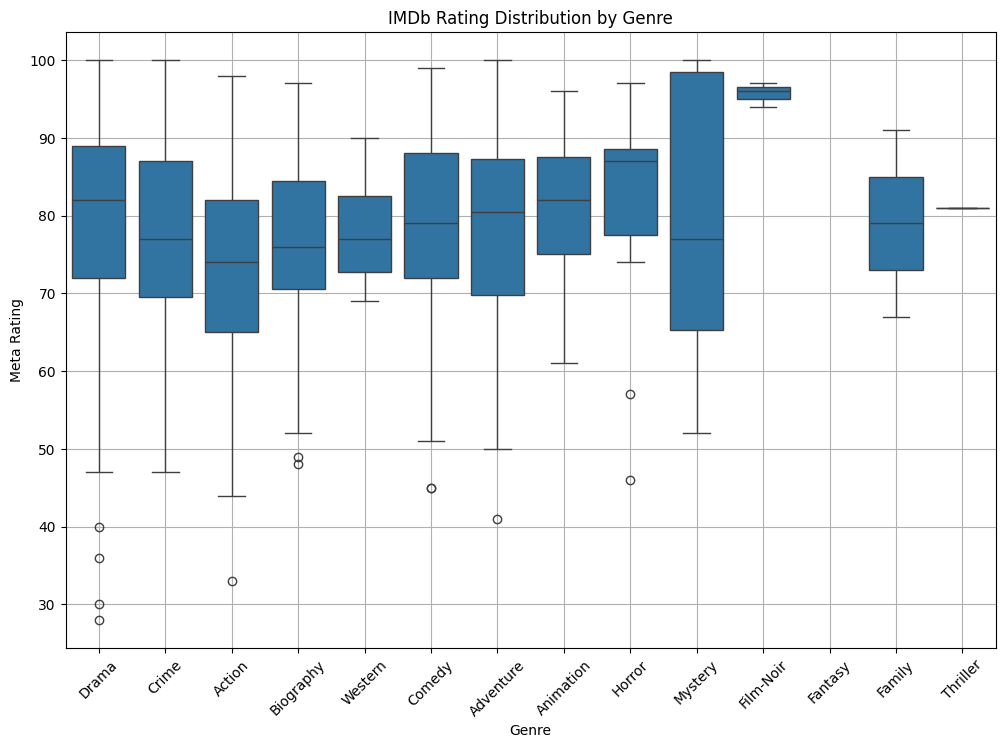

In [34]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Primary_Genre', y='Meta_score', data=df_raw)
plt.xticks(rotation=45)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Meta Rating')
plt.grid(True)
plt.show()

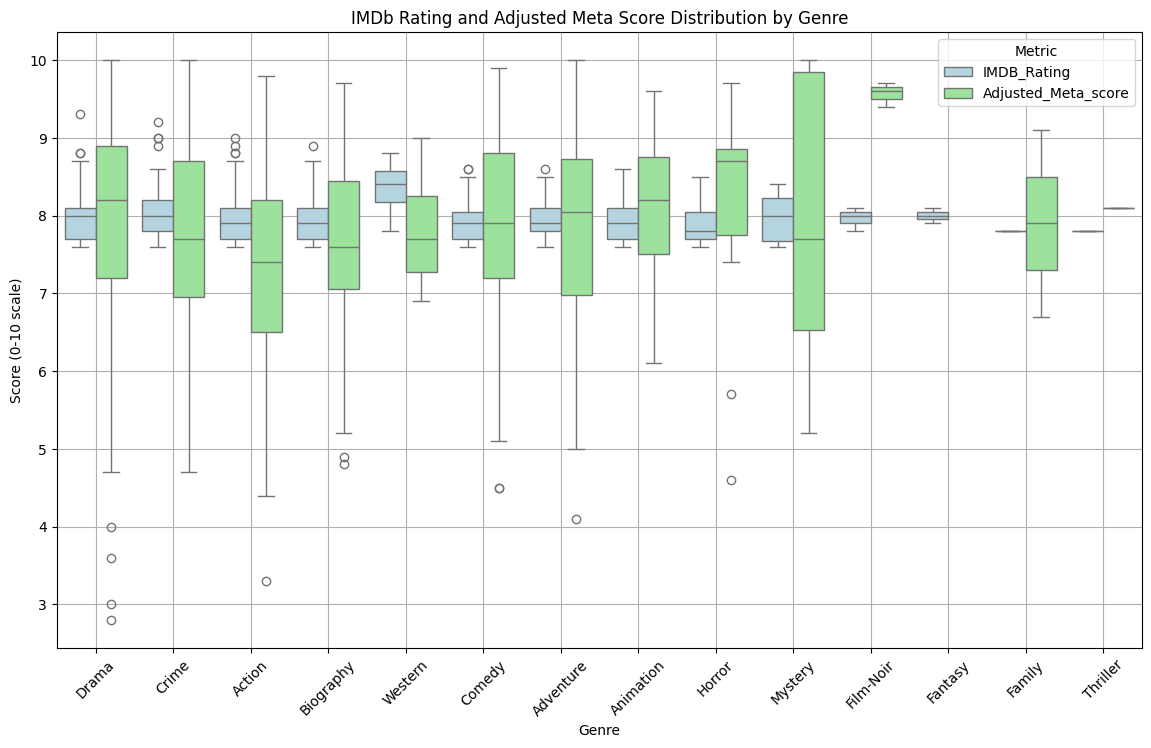

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_raw is your DataFrame
df_raw['Adjusted_Meta_score'] = df_raw['Meta_score'] / 10


df_melted = df_raw.melt(id_vars='Primary_Genre', value_vars=['IMDB_Rating', 'Adjusted_Meta_score'],
                        var_name='Score_Type', value_name='Score')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Primary_Genre', y='Score', hue='Score_Type', data=df_melted,
            palette=['lightblue', 'lightgreen'])

plt.xticks(rotation=45)
plt.title('IMDb Rating and Adjusted Meta Score Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Score (0-10 scale)')
plt.legend(title='Metric')
plt.grid(True)
plt.show()


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   

               Series_Title Released_Year  Certificate  Runtime   Genre  \
0  The Shawshank Redemption          1994         18.0    142.0   Drama   
1             The Godfather          1972         18.0    175.0   Crime   
1             The Godfather          1972         18.0    175.0   Drama   
2           The Dark Knight          2008          7.0    152.0  Action   
2           The Dark Knight          2008          7.0    152.0   Crime   

   IMDB_Rating                                           Overview  Meta_score  \
0          9.3  Two imprisoned men bond over a number of years...        80.0   
1          9.2  An organized crime dynasty's aging

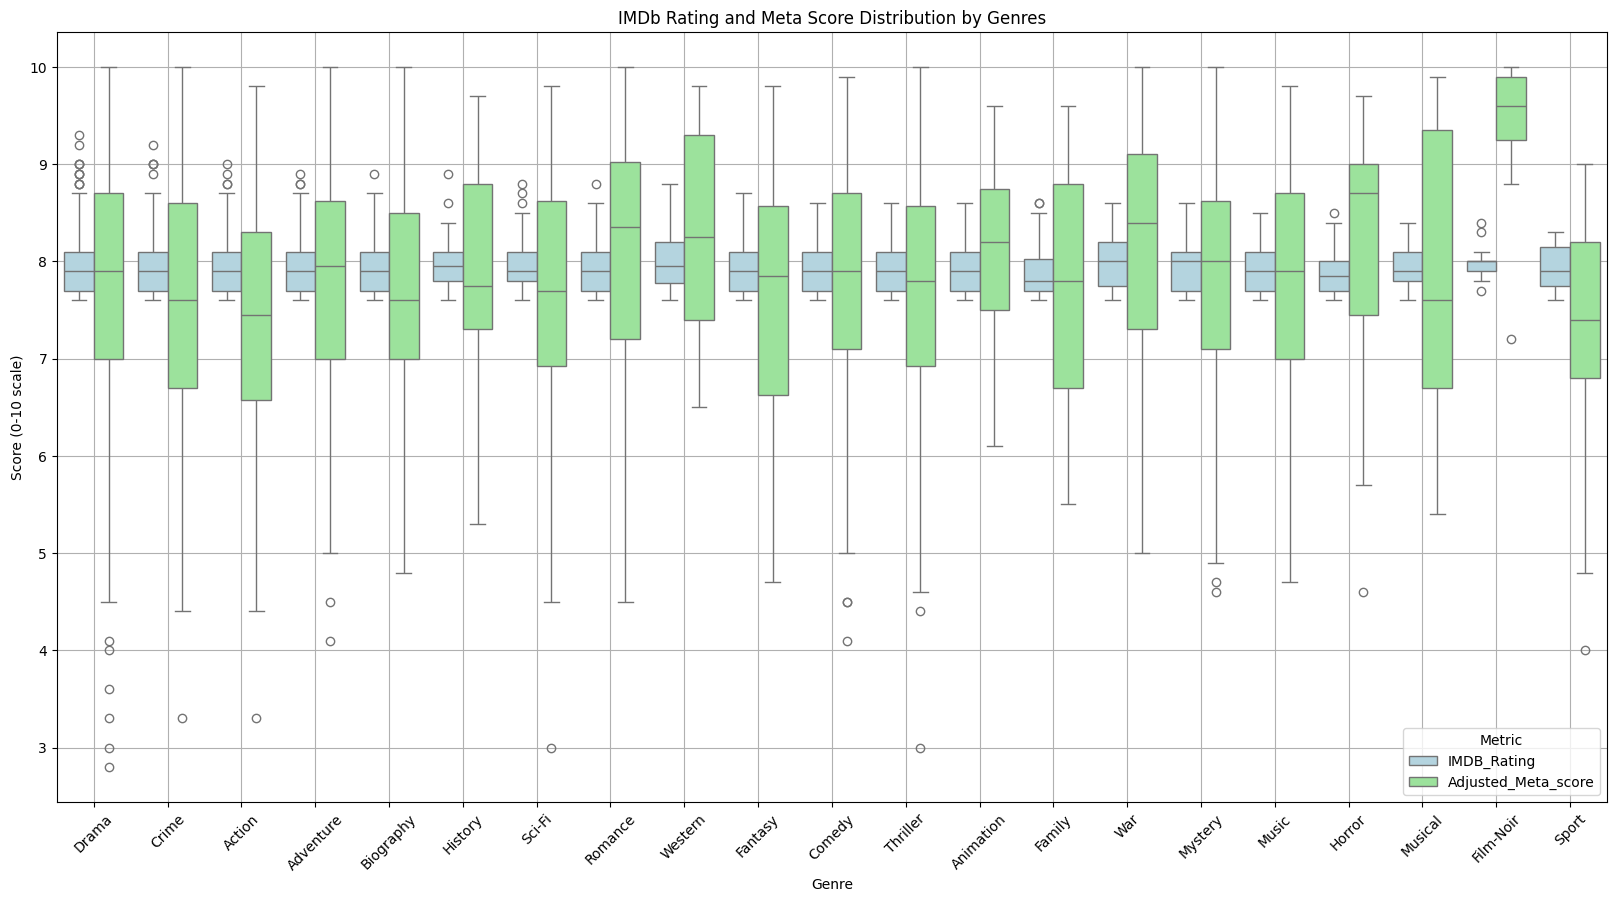

In [29]:
# FINAL


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_raw is your original DataFrame with a column 'Genre' that contains lists of genres
# Exploding the 'Genre' column
df_exploded = df_raw.explode('Genre')
df_exploded['Adjusted_Meta_score'] = df_exploded['Meta_score'] / 10  # Adjusting Meta_score

# Check the transformation
print(df_exploded.head())

# Reshape the DataFrame to facilitate using 'hue' in seaborn plots
df_melted = df_exploded.melt(id_vars=['Genre'], value_vars=['IMDB_Rating', 'Adjusted_Meta_score'],
                             var_name='Score_Type', value_name='Score')


plt.figure(figsize=(20, 10))
sns.boxplot(x='Genre', y='Score', hue='Score_Type', data=df_melted, palette=['lightblue', 'lightgreen'])

plt.xticks(rotation=45)
plt.title('IMDb Rating and Meta Score Distribution by Genres')
plt.xlabel('Genre')
plt.ylabel('Score (0-10 scale)')
plt.legend(title='Metric')
plt.grid(True)
plt.show()


Genre
Film-Noir    8.00
War          8.00
Mystery      8.00
History      7.95
Western      7.95
Crime        7.90
Drama        7.90
Fantasy      7.90
Comedy       7.90
Adventure    7.90
Music        7.90
Musical      7.90
Biography    7.90
Romance      7.90
Sci-Fi       7.90
Sport        7.90
Thriller     7.90
Animation    7.90
Action       7.90
Horror       7.85
Family       7.80
Name: IMDB_Rating, dtype: float64


Text(0, 0.5, 'Score (0-10 scale)')

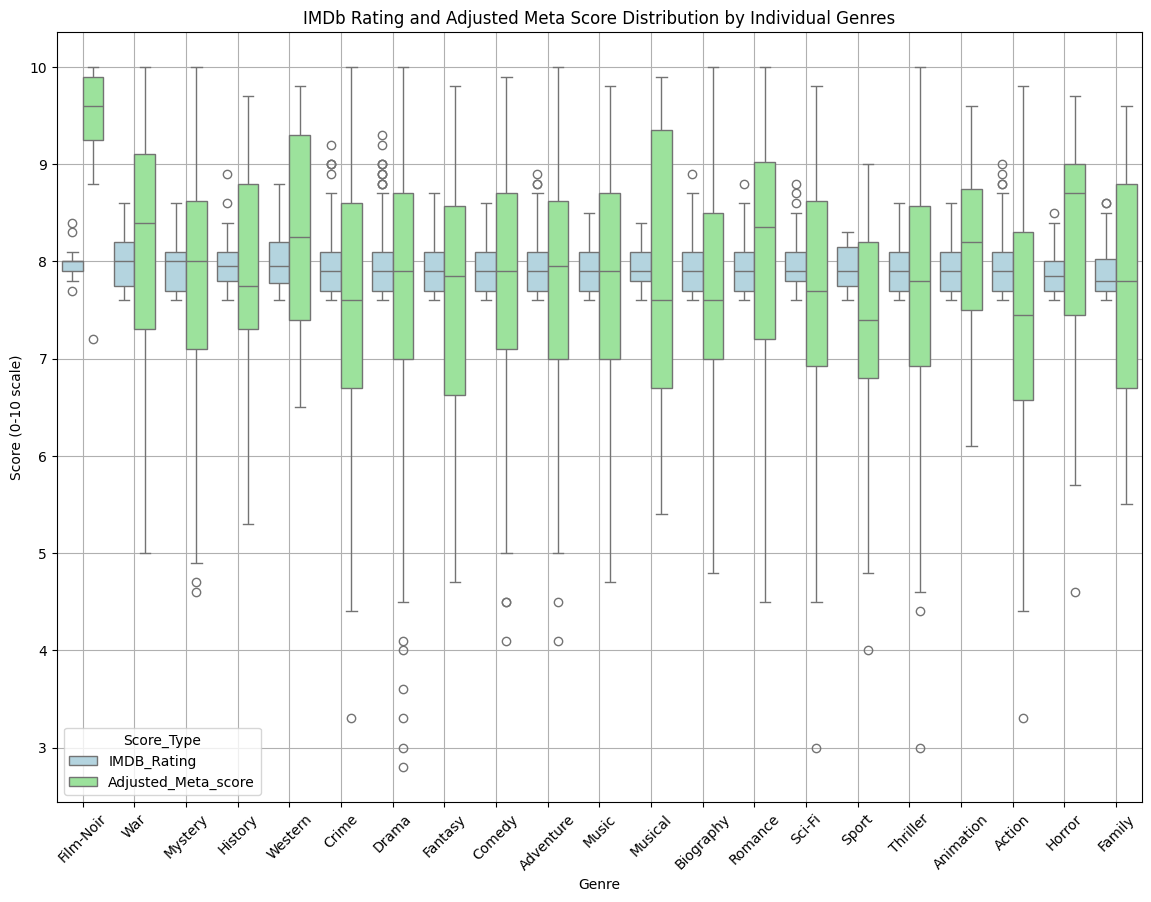

In [32]:
# Calculate the median IMDB Rating for each genre
genre_medians = df_exploded.groupby('Genre')['IMDB_Rating'].median().sort_values(ascending=False)

# Print out the sorted genres by median IMDB rating
print(genre_medians)

# Reshape the DataFrame for visualization
df_melted = df_exploded.melt(id_vars=['Genre'], value_vars=['IMDB_Rating', 'Adjusted_Meta_score'],
                             var_name='Score_Type', value_name='Score')

# Create the boxplot with ordered genres
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genre', y='Score', hue='Score_Type', data=df_melted,
            palette=['lightblue', 'lightgreen'],
            order=genre_medians.index)  # Order the x-axis by the sorted genres

plt.xticks(rotation=45)
plt.title('IMDb Rating and Adjusted Meta Score Distribution by Individual Genres')
plt.xlabel('Genre')
plt.grid(True)
plt.ylabel('Score (0-10 scale)')


Genre
Film-Noir    96.0
Horror       87.0
War          84.0
Romance      83.5
Western      82.5
Animation    82.0
Mystery      80.0
Adventure    79.5
Comedy       79.0
Drama        79.0
Music        79.0
Fantasy      78.5
Thriller     78.0
Family       78.0
History      77.5
Sci-Fi       77.0
Musical      76.0
Crime        76.0
Biography    76.0
Action       74.5
Sport        74.0
Name: Meta_score, dtype: float64


Text(0, 0.5, 'Score (0-10 scale)')

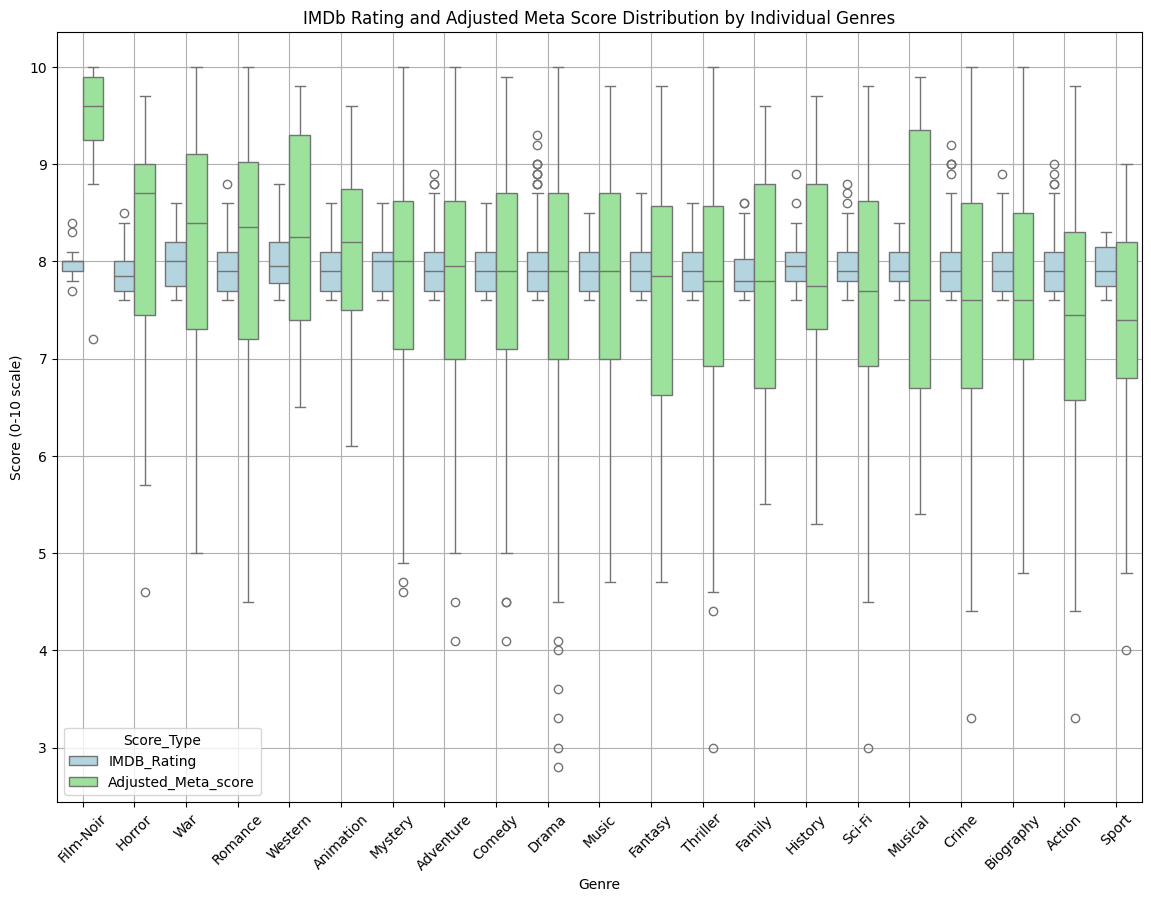

In [33]:
# Calculate the median IMDB Rating for each genre
genre_medians = df_exploded.groupby('Genre')['Meta_score'].median().sort_values(ascending=False)

# Print out the sorted genres by median IMDB rating
print(genre_medians)

# Reshape the DataFrame for visualization
df_melted = df_exploded.melt(id_vars=['Genre'], value_vars=['IMDB_Rating', 'Adjusted_Meta_score'],
                             var_name='Score_Type', value_name='Score')

# Create the boxplot with ordered genres
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genre', y='Score', hue='Score_Type', data=df_melted,
            palette=['lightblue', 'lightgreen'],
            order=genre_medians.index)  # Order the x-axis by the sorted genres

plt.xticks(rotation=45)
plt.title('IMDb Rating and Adjusted Meta Score Distribution by Individual Genres')
plt.xlabel('Genre')
plt.grid(True)
plt.ylabel('Score (0-10 scale)')

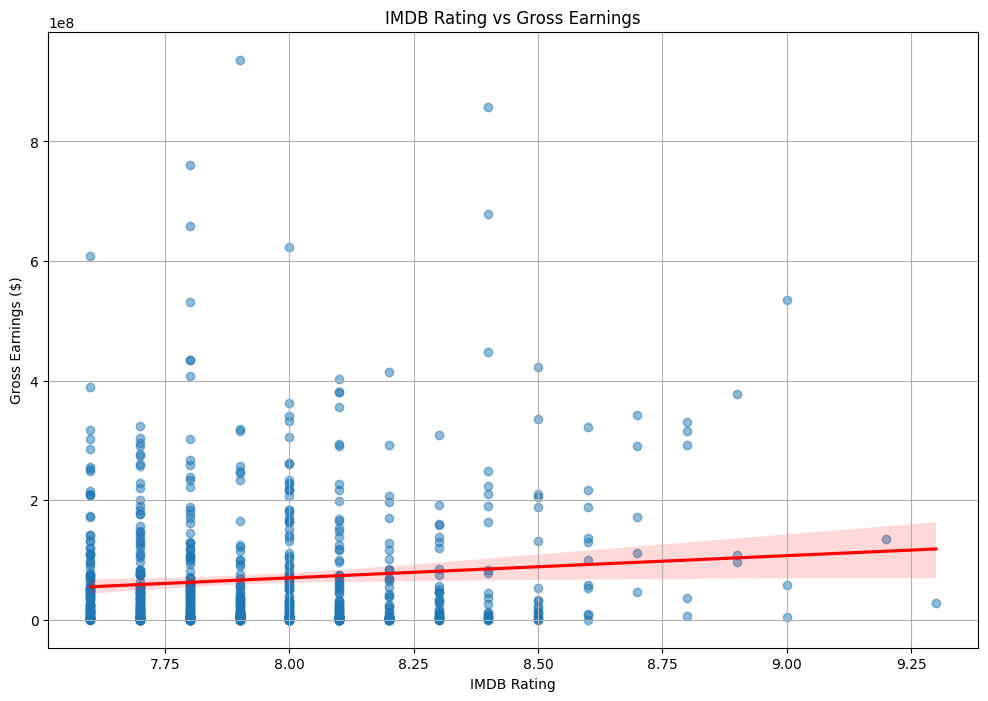

In [22]:
plt.figure(figsize=(12, 8))
sns.regplot(x='IMDB_Rating', y='Gross', data=df_raw, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('IMDB Rating vs Gross Earnings')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings ($)')
plt.grid(True)
plt.show()

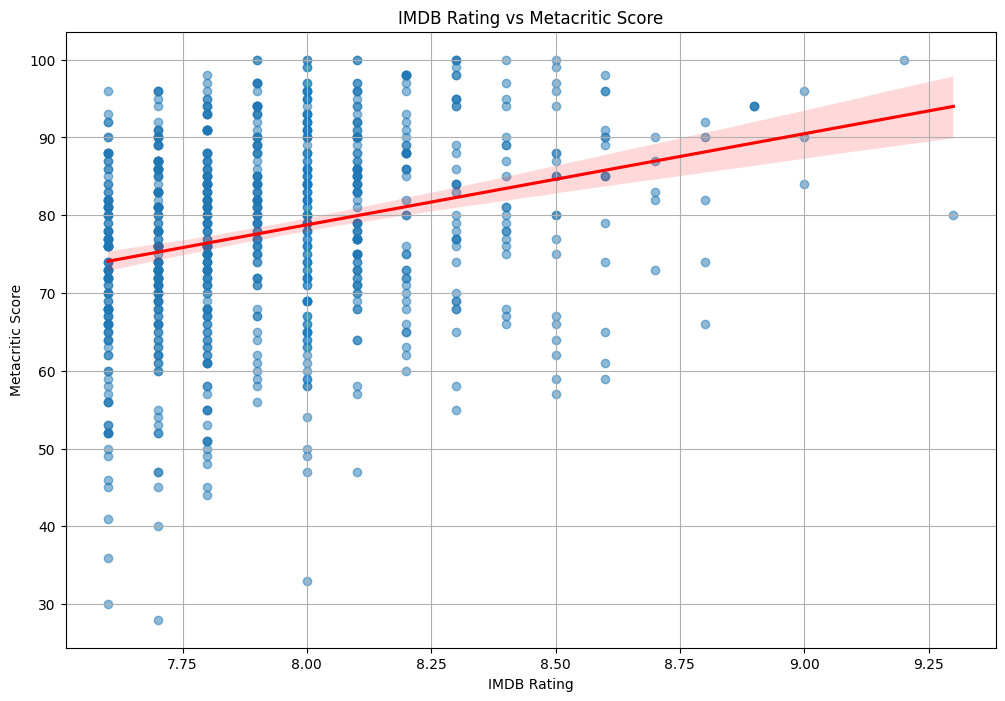

In [24]:
# FINAL

plt.figure(figsize=(12, 8))
sns.regplot(x='IMDB_Rating', y='Meta_score', data=df_raw, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('IMDB Rating vs Metacritic Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Metacritic Score')
plt.grid(True)
plt.show()

---------------------------- IGNORE -------------------------------------

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example function to calculate similarity
def calculate_similarity(df, index):
    similarities = {}
    target = df.iloc[index]
    for i, row in df.iterrows():
        if i != index:
            sim_score = 0
            # Combine weighted scores from different features
            sim_score += cosine_similarity([target['overview_tfidf']], [row['overview_tfidf']])[0][0]
            # Add other similarities, weighted appropriately
            similarities[row['Series_Title']] = sim_score
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)

def recommend_movies(title, top_n=10):
    index = df_raw[df_raw['Series_Title'] == title].index[0]
    recommendations = calculate_similarity(df_raw, index)
    return recommendations[:top_n]

# Filter the DataFrame for 'The Dark Knight' and then access 'overview_tfidf'
overview_tfidf = df_raw[df_raw['Series_Title'] == 'The Dark Knight'].index[0]
targ = df_raw.iloc[2]
targ_mat = targ["overview_tfidf"]
#print(targ["overview_tfidf"])
print(cosine_similarity([targ_mat],[targ_mat]))

print

[[1.]]


In [ ]:
recommend_movies('The Dark Knight')

[('Batman Begins', 0.2044888658657493),
 ('The Dark Knight Rises', 0.17761258251614476),
 ('Joker', 0.09853672377205022),
 ('Kill Bill: Vol. 1', 0.09273886468830327),
 ('La battaglia di Algeri', 0.08940649780155555),
 ('The Hurricane', 0.08039428178468234),
 ('Mulan', 0.07745579884006172),
 ('Wreck-It Ralph', 0.07729067757141043),
 ('Batman: Mask of the Phantasm', 0.07450408360309729),
 ('Jaws', 0.07192009751558805)]

In [ ]:
recommend_movies('The Hurricane')

[('Who Framed Roger Rabbit', 0.24458366976571683),
 ('Män som hatar kvinnor', 0.1144426989514485),
 ('Miracle in cell NO.7', 0.1129958398425462),
 ('La battaglia di Algeri', 0.11259850751046145),
 ('Cinderella Man', 0.10960241426495723),
 ('Young Frankenstein', 0.10910904987974013),
 ('Rocky', 0.10778979948306887),
 ('Key Largo', 0.10017944076547909),
 ('Batman: Mask of the Phantasm', 0.09383041303959276),
 ('The Fighter', 0.09057468108755788)]

Our graph demonstrates that there are an overall more apperanace of the drama category in our genre. Can maybe try the concept of weighted genres


In [ ]:
# sales_by_decade = df_raw.groupby('Genre')['IMDB_Rating'].sum()
# print(sales_by_decade)

# # Genre appereaces in each movie
# # IMDB Rating 
# # Graphs with multiple variable
# # Trying to find correlations 
# # Scatter plots - two or three variable scatterplots
# # Four variable one - Budget, Year Release (Two), Decade
# # Two Axes, Color, and Size
# #IMDB Ratings vs Metric Scores

cosine_similarity("Aldo", "Aldo")

InvalidParameterError: The 'X' parameter of cosine_similarity must be an array-like or a sparse matrix. Got 'Aldo' instead.

In [61]:
from scipy.spatial import distance

# Calculate Euclidean distance between two movies
dist = distance.euclidean(4, 10)

ValueError: Input vector should be 1-D.

Ok here is what I think:

- We make a recommendation based #1- the similarities between descriptions, #2- movie ratings (imdb rating? - only consider highest ranked) #3 genres (does the movie have same genres?) (full/partial/etc?) #4-  casts/directions ( include that?)
- maybe we can start looking at just the description and ratings.
- follow up with the genres
- and then look at the catss


Here are my findings:

- There are different type of encoders we can utilize to compare different forms of data
- We will utilize  encoders.transform and np.dot to compare to see if the movies share a genre 
- Ok so for the ratings, we can look at the cosine similarity or euclidian distance
- I am also seeing that you can use top ratings - maybe do we wanna check t
- Gros


Description
IMDB - similarity 
Genre 
Gross Revenue

IMDB and Year, MetaScore, Runtime, Scale the differences, between 0 and 1. Similarity. 
- Similarity Percent - movie with the fartherst . ranges percent. Percents - multipl